In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('BIP_numerical_NA.csv')

In [3]:
data['PlayResult'].describe() 

count    3813.000000
mean        0.472069
std         0.499285
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: PlayResult, dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 54 columns):
Unnamed: 0             3813 non-null int64
PitchNo                3813 non-null int64
PAofInning             3813 non-null int64
PitchofPA              3813 non-null int64
PitcherId              3813 non-null float64
PitcherThrows          3813 non-null int64
BatterId               3813 non-null float64
BatterSide             3813 non-null int64
Inning                 3813 non-null int64
Outs                   3813 non-null int64
Balls                  3813 non-null int64
Strikes                3813 non-null int64
OutsOnPlay             3813 non-null int64
RunsScored             3813 non-null int64
RelSpeed               3813 non-null float64
VertRelAngle           3813 non-null float64
HorzRelAngle           3813 non-null float64
SpinRate               3813 non-null float64
SpinAxis               3813 non-null float64
RelHeight              3813 non-null float64
RelSide          

In [5]:
data['Bearing'].describe() # delete values outside of -45 to 45

count    3813.000000
mean        0.120568
std        24.569480
min       -62.861782
25%       -19.518035
50%         0.380027
75%        19.721306
max        58.995161
Name: Bearing, dtype: float64

In [6]:
data['PlayResult'].describe() 

count    3813.000000
mean        0.472069
std         0.499285
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: PlayResult, dtype: float64

In [7]:
data = data[data['Bearing'].abs()<=45]

In [8]:
data['Bearing'].describe() 

count    3742.000000
mean       -0.088625
std        23.836941
min       -44.993161
25%       -19.196951
50%         0.293265
75%        19.145796
max        44.941170
Name: Bearing, dtype: float64

In [9]:
data['-45_to_-35'] = 0
data['-35_to_-25'] = 0
data['-25_to_-15'] = 0
data['-15_to_-5'] = 0
data['-5_to_5'] = 0
data['5_to_15'] = 0
data['15_to_25'] = 0
data['25_to_35'] = 0
data['35_to_45'] = 0

In [10]:
data.head()

,Unnamed: 0,PitchNo,PAofInning,PitchofPA,PitcherId,PitcherThrows,BatterId,BatterSide,Inning,Outs,...,PlayResult,-45_to_-35,-35_to_-25,-25_to_-15,-15_to_-5,-5_to_5,5_to_15,15_to_25,25_to_35,35_to_45
0,30,31,4,4,8886490.0,1,8889935.0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,52,53,3,1,8889942.0,1,8886477.0,0,2,1,...,1,0,0,0,0,0,0,0,0,0
2,62,63,1,1,8886490.0,1,8889937.0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
3,92,93,7,2,8889947.0,1,8886477.0,0,3,2,...,1,0,0,0,0,0,0,0,0,0
4,127,128,4,3,8889947.0,1,8881734.0,1,4,2,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.loc[((data['Bearing'] > -45) & (data['Bearing'] < -35)), '-45_to_-35'] = 1

In [12]:
data.loc[((data['Bearing'] > -35) & (data['Bearing'] < -25)), '-35_to_-25'] = 1

In [13]:
data.loc[((data['Bearing'] > -25) & (data['Bearing'] < -15)), '-25_to_-15'] = 1

In [14]:
data.loc[((data['Bearing'] > -15) & (data['Bearing'] < -5)), '-15_to_-5'] = 1

In [15]:
data.loc[((data['Bearing'] > -5) & (data['Bearing'] < 5)), '-5_to_5'] = 1

In [16]:
data.loc[((data['Bearing'] > 5) & (data['Bearing'] < 15)), '5_to_15'] = 1

In [17]:
data.loc[((data['Bearing'] > 15) & (data['Bearing'] < 25)), '15_to_25'] = 1

In [18]:
data.loc[((data['Bearing'] > 25) & (data['Bearing'] < 35)), '25_to_35'] = 1

In [19]:
data.loc[((data['Bearing'] > 35) & (data['Bearing'] < 45)), '35_to_45'] = 1

In [20]:
data.head()

,Unnamed: 0,PitchNo,PAofInning,PitchofPA,PitcherId,PitcherThrows,BatterId,BatterSide,Inning,Outs,...,PlayResult,-45_to_-35,-35_to_-25,-25_to_-15,-15_to_-5,-5_to_5,5_to_15,15_to_25,25_to_35,35_to_45
0,30,31,4,4,8886490.0,1,8889935.0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,52,53,3,1,8889942.0,1,8886477.0,0,2,1,...,1,0,0,0,0,0,0,0,1,0
2,62,63,1,1,8886490.0,1,8889937.0,0,2,1,...,0,0,0,0,0,1,0,0,0,0
3,92,93,7,2,8889947.0,1,8886477.0,0,3,2,...,1,0,0,0,0,0,0,1,0,0
4,127,128,4,3,8889947.0,1,8881734.0,1,4,2,...,0,0,0,0,0,1,0,0,0,0


In [21]:
data = data.loc[:, data.columns != "Unnamed: 0"]

In [22]:
data.head()

,PitchNo,PAofInning,PitchofPA,PitcherId,PitcherThrows,BatterId,BatterSide,Inning,Outs,Balls,...,PlayResult,-45_to_-35,-35_to_-25,-25_to_-15,-15_to_-5,-5_to_5,5_to_15,15_to_25,25_to_35,35_to_45
0,31,4,4,8886490.0,1,8889935.0,1,1,1,2,...,1,0,1,0,0,0,0,0,0,0
1,53,3,1,8889942.0,1,8886477.0,0,2,1,0,...,1,0,0,0,0,0,0,0,1,0
2,63,1,1,8886490.0,1,8889937.0,0,2,1,0,...,0,0,0,0,0,1,0,0,0,0
3,93,7,2,8889947.0,1,8886477.0,0,3,2,1,...,1,0,0,0,0,0,0,1,0,0
4,128,4,3,8889947.0,1,8881734.0,1,4,2,1,...,0,0,0,0,0,1,0,0,0,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3742 entries, 0 to 3812
Data columns (total 62 columns):
PitchNo                3742 non-null int64
PAofInning             3742 non-null int64
PitchofPA              3742 non-null int64
PitcherId              3742 non-null float64
PitcherThrows          3742 non-null int64
BatterId               3742 non-null float64
BatterSide             3742 non-null int64
Inning                 3742 non-null int64
Outs                   3742 non-null int64
Balls                  3742 non-null int64
Strikes                3742 non-null int64
OutsOnPlay             3742 non-null int64
RunsScored             3742 non-null int64
RelSpeed               3742 non-null float64
VertRelAngle           3742 non-null float64
HorzRelAngle           3742 non-null float64
SpinRate               3742 non-null float64
SpinAxis               3742 non-null float64
RelHeight              3742 non-null float64
RelSide                3742 non-null float64
Extension      

In [24]:
play_result = data['PlayResult']

In [25]:
data = data.loc[:, data.columns != "PlayResult"]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3742 entries, 0 to 3812
Data columns (total 61 columns):
PitchNo                3742 non-null int64
PAofInning             3742 non-null int64
PitchofPA              3742 non-null int64
PitcherId              3742 non-null float64
PitcherThrows          3742 non-null int64
BatterId               3742 non-null float64
BatterSide             3742 non-null int64
Inning                 3742 non-null int64
Outs                   3742 non-null int64
Balls                  3742 non-null int64
Strikes                3742 non-null int64
OutsOnPlay             3742 non-null int64
RunsScored             3742 non-null int64
RelSpeed               3742 non-null float64
VertRelAngle           3742 non-null float64
HorzRelAngle           3742 non-null float64
SpinRate               3742 non-null float64
SpinAxis               3742 non-null float64
RelHeight              3742 non-null float64
RelSide                3742 non-null float64
Extension      

In [27]:
data['PlayResult'] = play_result

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3742 entries, 0 to 3812
Data columns (total 62 columns):
PitchNo                3742 non-null int64
PAofInning             3742 non-null int64
PitchofPA              3742 non-null int64
PitcherId              3742 non-null float64
PitcherThrows          3742 non-null int64
BatterId               3742 non-null float64
BatterSide             3742 non-null int64
Inning                 3742 non-null int64
Outs                   3742 non-null int64
Balls                  3742 non-null int64
Strikes                3742 non-null int64
OutsOnPlay             3742 non-null int64
RunsScored             3742 non-null int64
RelSpeed               3742 non-null float64
VertRelAngle           3742 non-null float64
HorzRelAngle           3742 non-null float64
SpinRate               3742 non-null float64
SpinAxis               3742 non-null float64
RelHeight              3742 non-null float64
RelSide                3742 non-null float64
Extension      

In [29]:
data.head()

,PitchNo,PAofInning,PitchofPA,PitcherId,PitcherThrows,BatterId,BatterSide,Inning,Outs,Balls,...,-45_to_-35,-35_to_-25,-25_to_-15,-15_to_-5,-5_to_5,5_to_15,15_to_25,25_to_35,35_to_45,PlayResult
0,31,4,4,8886490.0,1,8889935.0,1,1,1,2,...,0,1,0,0,0,0,0,0,0,1
1,53,3,1,8889942.0,1,8886477.0,0,2,1,0,...,0,0,0,0,0,0,0,1,0,1
2,63,1,1,8886490.0,1,8889937.0,0,2,1,0,...,0,0,0,0,1,0,0,0,0,0
3,93,7,2,8889947.0,1,8886477.0,0,3,2,1,...,0,0,0,0,0,0,1,0,0,1
4,128,4,3,8889947.0,1,8881734.0,1,4,2,1,...,0,0,0,0,1,0,0,0,0,0


In [30]:
data.to_csv('data_nominalized_bearing.csv')

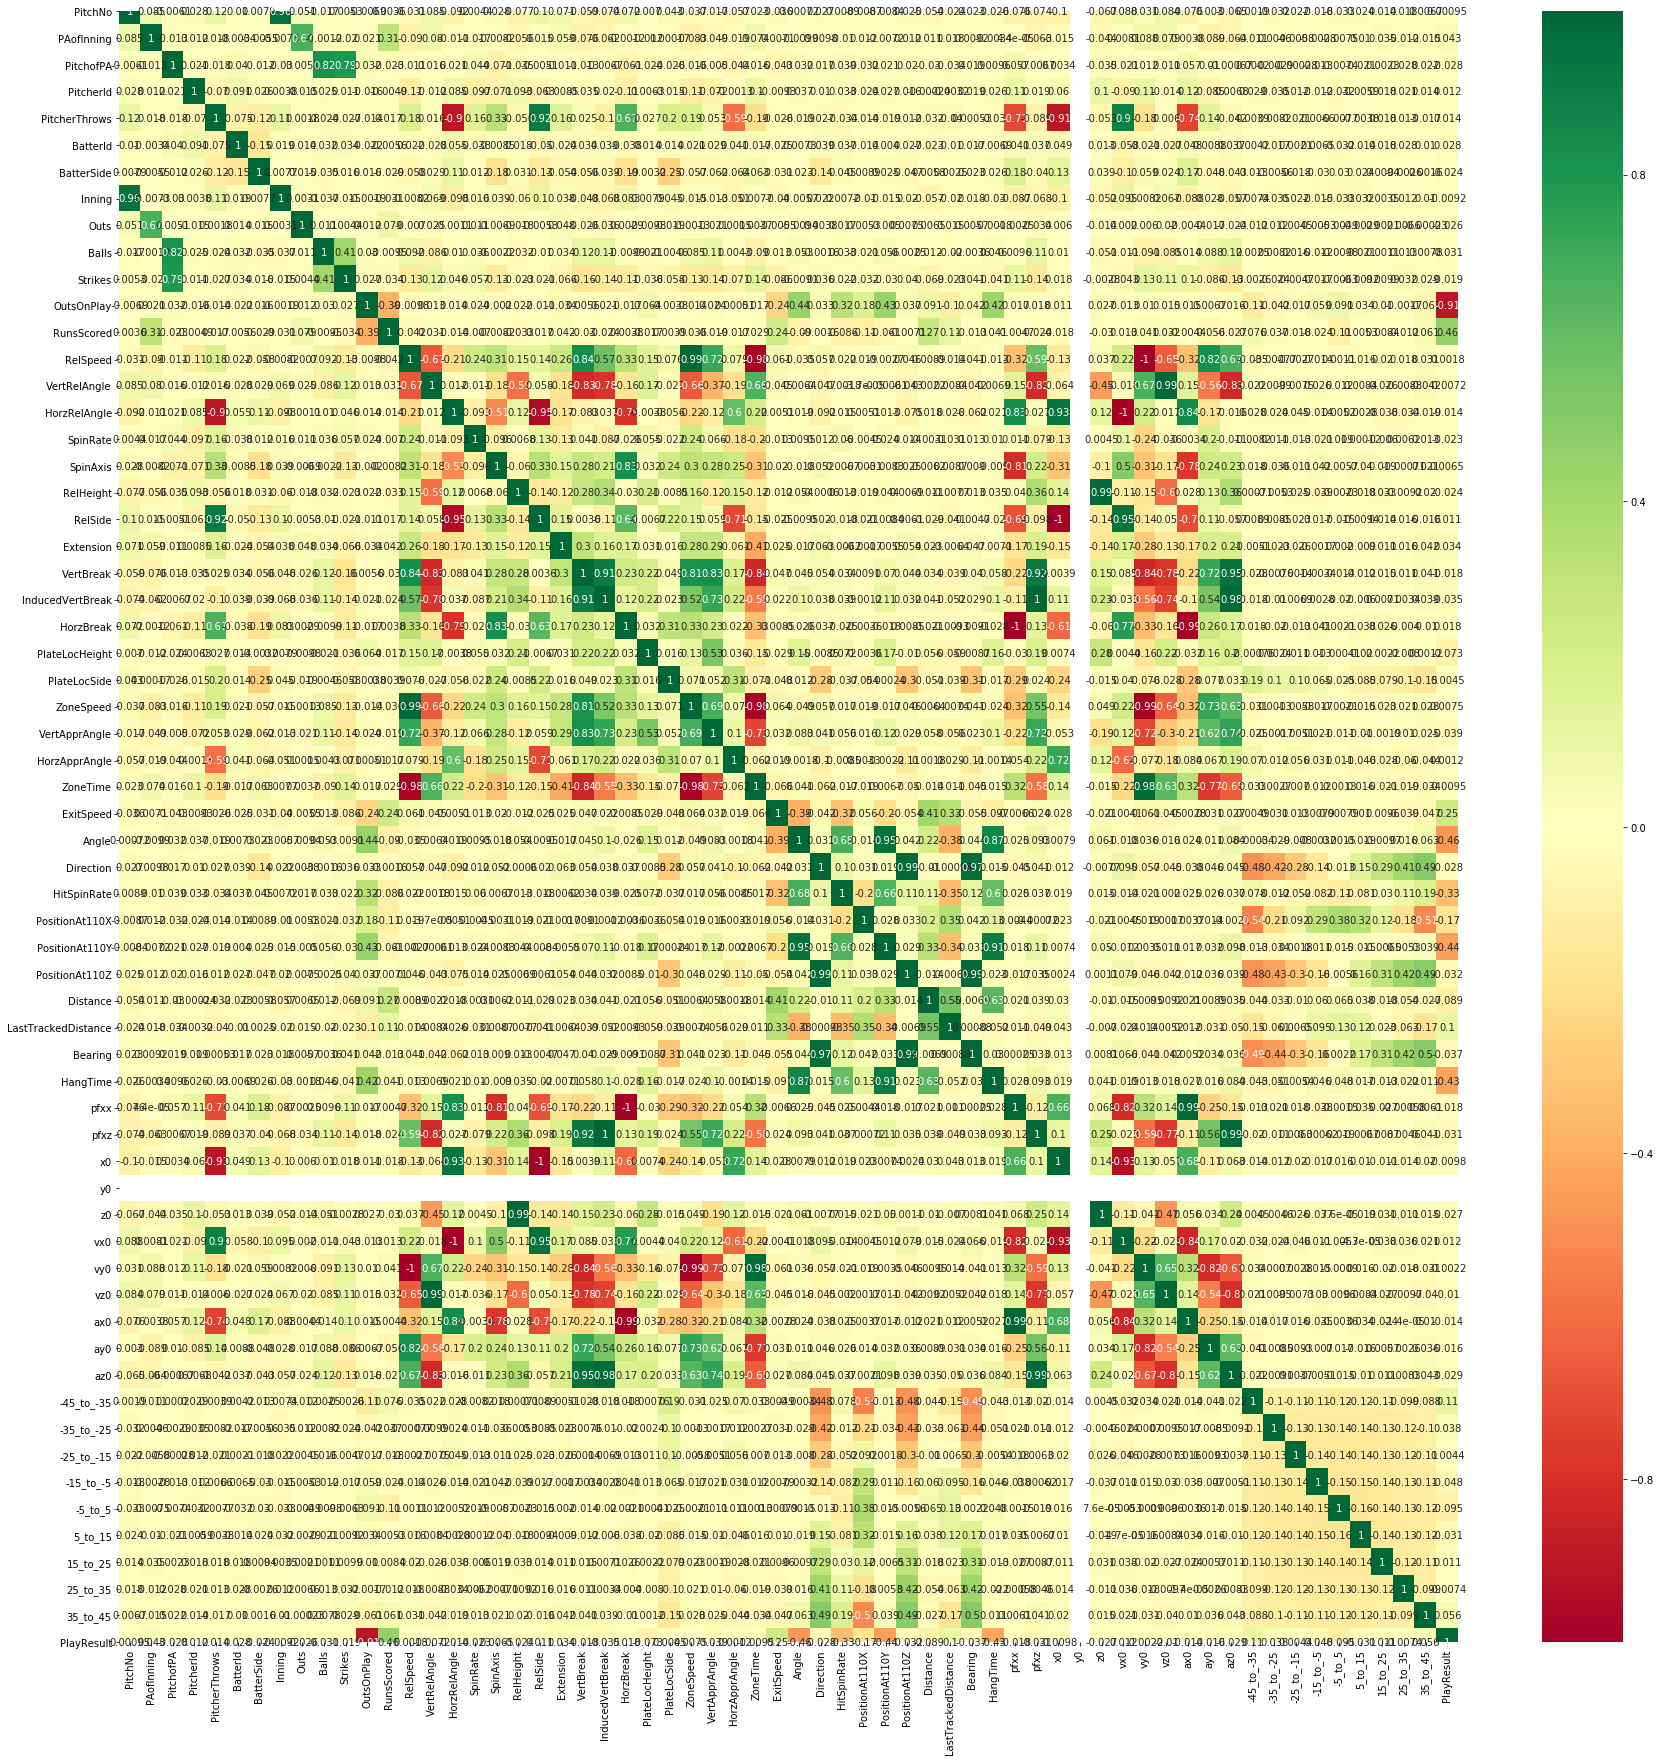

In [43]:
corrmat = data.corr()
top_corr_features = corrmat.index
play_result = corrmat.index[-1]
plt.figure(figsize = (30,30))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [52]:
corr = data[top_corr_features].corr()

In [55]:
corr.to_csv('corr.csv')